In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#импортируем библиотеки

In [14]:
data = pd.read_csv('food_coded.csv') # читаем csv файл с данными

In [15]:
data.head(3) # вывести первые три строки таблицы

,GPA,Gender,breakfast,calories_chicken,calories_day,calories_scone,coffee,comfort_food,comfort_food_reasons,comfort_food_reasons_coded,...,soup,sports,thai_food,tortilla_calories,turkey_calories,type_sports,veggies_day,vitamins,waffle_calories,weight
0,2.4,2,1,430,NaN,315.0,1,none,we dont have comfort,9.0,...,1.0,1.0,1,1165.0,345,car racing,5,1,1315,187
1,3.654,1,1,610,3.0,420.0,2,"chocolate, chips, ice cream","Stress, bored, anger",1.0,...,1.0,1.0,2,725.0,690,Basketball,4,2,900,155
2,3.3,1,1,720,4.0,420.0,2,"frozen yogurt, pizza, fast food","stress, sadness",1.0,...,1.0,2.0,5,1165.0,500,none,5,1,900,I'm not answering this.


# Preprocessing

In [16]:
# Excluding open ended columns
open_ended_columns = ['comfort_food','comfort_food_reasons','diet_current','eating_changes','father_profession','mother_profession','fav_cuisine','food_childhood','healthy_meal','ideal_diet','meals_dinner_friend','type_sports']
data = data.drop(open_ended_columns, axis=1)

This code removes a set of columns from a pandas DataFrame called "data". 
The columns to be removed are listed in the "open_ended_columns" variable, which is a list of column names.
To remove the columns, the "drop" method of the DataFrame 
is used, passing the list of column names as the first argument 
and the axis along which to remove them (in this case, axis=1 indicates that the columns should be removed). 
They may be open-ended or free-text response fields, 
which difficult to analyze or compare in a quantitative manner. 
Removing these columns could simplify subsequent analysis of the data.

In [17]:
data['GPA'].unique() # массив уникальных значаений столбца GPA

array(['2.4', '3.654', '3.3', '3.2', '3.5', '2.25', '3.8', '3.904', '3.4',
       '3.6', '3.1', nan, '4', '2.2', '3.87', '3.7', '3.9', '2.8', '3',
       '3.65', '3.89', '2.9', '3.605', '3.83', '3.292', '3.35',
       'Personal ', '2.6', '3.67', '3.73', '3.79 bitch', '2.71', '3.68',
       '3.75', '3.92', 'Unknown', '3.77', '3.63', '3.882'], dtype=object)

In [18]:
# cleaning the GPA column
data['GPA'] = data['GPA'].replace('Personal ', np.NaN)
data['GPA'] = data['GPA'].replace('Unknown', np.NaN)
data['GPA'] = data['GPA'].replace('3.79 bitch', '3.79')
data['GPA'] = data['GPA'].astype(np.float64)
data['GPA'] = data['GPA'].fillna(data['GPA'].mean())

This code manipulates the 'GPA' column of a pandas DataFrame called 'data'.

The first two lines replace any values in the 'GPA' column that are equal to 'Personal' or 'Unknown' with NaN (missing value) using the 'replace' method. This is likely done to remove non-numeric or non-informative values from the data.
The third line replaces a specific value ('3.79 bitch') with a valid float value ('3.79') using 'replace' again. This may be necessary if the original value was a typo or an incorrect input.
The fourth line converts the 'GPA' column to a float64 data type using the 'astype' method. This is likely done because GPA is typically a numeric value.
Finally, the fifth line fills any missing values in the 'GPA' column with the mean of the column using the 'fillna' method. This is likely done to impute missing values in the data, so that the 'GPA' column can be used for analysis.


In [19]:
data.isna().sum() # missing data in columns 
# выводит сколько пропущенных(пустых) данных в столбцах

GPA                              0
Gender                           0
breakfast                        0
calories_chicken                 0
calories_day                    19
calories_scone                   1
coffee                           0
comfort_food_reasons_coded      19
cook                             3
comfort_food_reasons_coded.1     0
cuisine                         17
diet_current_coded               0
drink                            2
eating_changes_coded             0
eating_changes_coded1            0
eating_out                       0
employment                       9
ethnic_food                      0
exercise                        13
father_education                 1
fav_cuisine_coded                0
fav_food                         2
fries                            0
fruit_day                        0
grade_level                      0
greek_food                       0
healthy_feeling                  0
ideal_diet_coded                 0
income              

In [20]:
# numerical columns
numeric_nulls = [column for column in data.columns if data.dtypes[column] != 'object' and data.isna().sum()[column] != 0]
numeric_nulls

['calories_day',
 'calories_scone',
 'comfort_food_reasons_coded',
 'cook',
 'cuisine',
 'drink',
 'employment',
 'exercise',
 'father_education',
 'fav_food',
 'income',
 'life_rewarding',
 'marital_status',
 'mother_education',
 'on_off_campus',
 'persian_food',
 'self_perception_weight',
 'soup',
 'sports',
 'tortilla_calories']

This code identifies all columns in a pandas DataFrame called 'data' that meet two conditions:

The data type of the column is not 'object', meaning it is numeric or boolean. This is checked using the 'dtypes' attribute of the DataFrame.
The column has at least one missing value, identified by checking the sum of missing values for that column using the 'isna' method and the 'sum' function.
The code creates a list of all column names that meet both conditions, which are stored in the variable 'numeric_nulls'. This list can be used to further process or analyze the columns with missing values in the dataset.


In [21]:
# fill in the missing data on the average of their columns
for column in numeric_nulls:
    data[column] = data[column].fillna(data[column].mean())
    
# заполняем пропущенные данные столбцов на среднюю соответсвуещего столбца

In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125 entries, 0 to 124
Data columns (total 49 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   GPA                           125 non-null    float64
 1   Gender                        125 non-null    int64  
 2   breakfast                     125 non-null    int64  
 3   calories_chicken              125 non-null    int64  
 4   calories_day                  125 non-null    float64
 5   calories_scone                125 non-null    float64
 6   coffee                        125 non-null    int64  
 7   comfort_food_reasons_coded    125 non-null    float64
 8   cook                          125 non-null    float64
 9   comfort_food_reasons_coded.1  125 non-null    int64  
 10  cuisine                       125 non-null    float64
 11  diet_current_coded            125 non-null    int64  
 12  drink                         125 non-null    float64
 13  eatin

In [23]:
data['weight'].unique() # выводим уникальные значения столбца WEIGHT

array(['187', '155', "I'm not answering this. ", 'Not sure, 240', '190',
       '180', '137', '125', '116', '110', '264', '123', '185', '145',
       '170', '135', '165', '175', '195', '105', '160', '167', '115',
       '205', nan, '128', '150', '140', '120', '100', '113', '168', '169',
       '200', '265', '192', '118', '210', '112', '144 lbs', '130', '127',
       '129', '260', '184', '230', '138', '156'], dtype=object)

In [24]:
data.shape # размер таблицы 125 строк и 49 столбцов

(125, 49)

In [25]:
# cleaning 'weight' column
data['weight'] = data['weight'].replace('Not sure, 240', '240')
data['weight'] = data['weight'].replace('144 lbs', '144')
data['weight'] = data['weight'].replace("I'm not answering this. ", np.NaN)
data = data.dropna(axis=0).reset_index(drop=True)

This code manipulates the 'weight' column of a pandas DataFrame called 'data', and then drops all rows with missing values.

The first line replaces a specific value ('Not sure, 240') with a valid value ('240') using the 'replace' method. This is likely done to correct a typo or incorrect input.
The second line does the same thing for another specific value ('144 lbs'), replacing it with '144'.
The third line replaces a specific value ("I'm not answering this. ") with NaN (missing value) using 'replace'. This may be done if the participant refused to answer the question or left it blank.
The fourth line drops any rows that contain missing values using the 'dropna' method, and then resets the index of the DataFrame using 'reset_index'. The 'axis=0' parameter of 'dropna' specifies that rows should be dropped if they contain missing values. The 'reset_index' method is used to renumber the index after dropping rows. This may be done to ensure that the remaining data is clean and can be used for analysis.


In [26]:
data.shape # стало 122 строк, удалили 3 строки

(122, 49)

In [27]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122 entries, 0 to 121
Data columns (total 49 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   GPA                           122 non-null    float64
 1   Gender                        122 non-null    int64  
 2   breakfast                     122 non-null    int64  
 3   calories_chicken              122 non-null    int64  
 4   calories_day                  122 non-null    float64
 5   calories_scone                122 non-null    float64
 6   coffee                        122 non-null    int64  
 7   comfort_food_reasons_coded    122 non-null    float64
 8   cook                          122 non-null    float64
 9   comfort_food_reasons_coded.1  122 non-null    int64  
 10  cuisine                       122 non-null    float64
 11  diet_current_coded            122 non-null    int64  
 12  drink                         122 non-null    float64
 13  eatin

In [28]:
data.isna().sum().sum() # no missing data

0

# ML

In [29]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

These are two import statements for modules from the scikit-learn (sklearn) library.

The first line imports the 'train_test_split' function from the 'model_selection' module of scikit-learn. This function can be used to split a dataset into training and testing subsets. The 'train_test_split' function randomly splits the data into two sets based on the 'test_size' parameter (by default, 25% of the data is allocated to the test set), and returns the resulting data subsets.
The second line imports the 'StandardScaler' class from the 'preprocessing' module of scikit-learn. This class is used to standardize a dataset by scaling each feature to have a mean of zero and a standard deviation of one. This can help to improve the performance of some machine learning algorithms, particularly those that are sensitive to the scale of the input data. The 'StandardScaler' class can be fit to a dataset using its 'fit' method, and then used to transform the data using its 'transform' method.


# Predicting Weight From Food Choices (LogisticRegression)

In [30]:
y = data.loc[:, 'weight'] # y это все строки столбца weight
X = data.drop('weight', axis=1) # Х это все строки кроме столбца weight
x_train, x_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=22)
# We then split the dataset into a training set and a testing set using the train_test_split function, with a test size of 0.7 (i.e., 70% of the data will be used for testing) and a random state of 22 (this is used to ensure that the split is reproducible).

In [31]:
scaler = StandardScaler()

x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

This code standardizes the training and testing data using the 'StandardScaler' class from scikit-learn.

The first line creates an instance of the 'StandardScaler' class and stores it in the variable 'scaler'.
The second line applies the scaler to the training data ('x_train') using its 'fit_transform' method. This method fits the scaler to the data by computing the mean and standard deviation of each feature in the training set, and then standardizes the data by subtracting the mean and dividing by the standard deviation. The resulting standardized data is stored back into the 'x_train' variable.
The third line applies the same scaler to the testing data ('x_test') using its 'transform' method. The 'transform' method applies the same mean and standard deviation computed during the fit step to the testing data, so that the testing data is standardized using the same scaling factors as the training data. The resulting standardized data is stored back into the 'x_test' variable.
Standardizing the data is an important preprocessing step that can help improve the performance of some machine learning algorithms by ensuring that all features are on the same scale.


In [32]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
classifier = LogisticRegression(random_state = 10)
classifier.fit(x_train, y_train)

LogisticRegression(random_state=10)

This code trains a logistic regression classifier using the training data.

The first line imports the 'LogisticRegression' class from the 'linear_model' module of scikit-learn. This class implements logistic regression, which is a commonly used classification algorithm for binary classification problems.
The second line imports the 'accuracy_score' function from the 'metrics' module of scikit-learn. This function can be used to calculate the accuracy of a classification model.
The third line creates an instance of the 'LogisticRegression' class and stores it in the variable 'classifier'. The 'random_state' parameter is set to 10 to ensure that the results are reproducible.
The fourth line fits the logistic regression classifier to the training data using the 'fit' method of the 'LogisticRegression' class. The 'fit' method learns the parameters of the logistic regression model from the training data by minimizing a loss function.
After this code is executed, the 'classifier' object contains the trained logistic regression model, which can be used to make predictions on new data.


In [33]:
y_pred = classifier.predict(x_test)
test_acc = accuracy_score(y_test, y_pred)
print('The Accuracy for Test Set is {}'.format(test_acc*100))

The Accuracy for Test Set is 2.7027027027027026


This code uses the trained logistic regression model to make predictions on the test data, and then calculates the accuracy of the predictions.

The first line uses the 'predict' method of the 'LogisticRegression' class to make predictions on the test data ('x_test'). The predicted labels are stored in the variable 'y_pred'.
The second line uses the 'accuracy_score' function from scikit-learn to calculate the accuracy of the predictions. The 'accuracy_score' function takes the true labels ('y_test') and the predicted labels ('y_pred') as input, and returns the proportion of correctly classified samples. The resulting test accuracy is stored in the variable 'test_acc'.
The third line uses a 'print' statement to display the test accuracy as a percentage. The '{}' is a placeholder for the value of 'test_acc*100', which is formatted using the 'format' method of the string. The resulting string is displayed in the console.
Overall, this code evaluates the performance of the logistic regression model on the test data by calculating the accuracy of the predictions. The test accuracy provides an estimate of how well the model generalizes to new, unseen data.


Text(0.5, 33.0, 'Predicted Values')

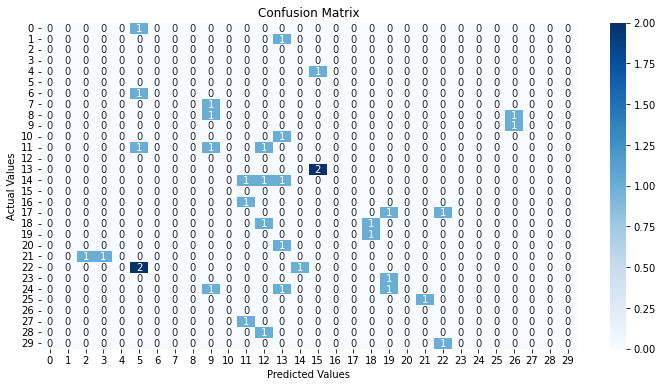

In [34]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
plt.figure(figsize=(12,6))
plt.title('Confusion Matrix')
sns.heatmap(cm, annot=True,fmt='d', cmap='Blues')
plt.ylabel('Actual Values')
plt.xlabel('Predicted Values')

This code visualizes the confusion matrix, which is a table that shows the number of true positive, false positive, true negative, and false negative predictions made by a classification model.

The first line imports the 'confusion_matrix' function from the 'metrics' module of scikit-learn. This function can be used to calculate the confusion matrix given the true labels and predicted labels.
The second line calculates the confusion matrix by calling the 'confusion_matrix' function with the true labels ('y_test') and predicted labels ('y_pred') as input. The resulting confusion matrix is stored in the variable 'cm'.
The third line creates a figure with a size of 12 by 6 using the 'figure' function of matplotlib.
The fourth line sets the title of the figure to 'Confusion Matrix' using the 'title' function of matplotlib.
The fifth line creates a heatmap of the confusion matrix using the 'heatmap' function of seaborn. The heatmap is annotated with the values of the confusion matrix using the 'annot' parameter, and the values are formatted as integers using the 'fmt' parameter. The colormap is set to 'Blues' using the 'cmap' parameter.
The sixth line sets the y-label of the heatmap to 'Actual Values' using the 'ylabel' function of matplotlib.
The seventh line sets the x-label of the heatmap to 'Predicted Values' using the 'xlabel' function of matplotlib.
Overall, this code provides a visual representation of the performance of the logistic regression model on the test data by showing the number of true positive, false positive, true negative, and false negative predictions. The confusion matrix can be used to evaluate the sensitivity, specificity, and overall accuracy of the model, as well as to identify areas where the model may be making errors.

# Predicting GPA from colories (linear regression)

In [35]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
y = data.loc[:, 'GPA']
X = data.loc[:, ['calories_chicken', 'calories_scone', 'turkey_calories', 'tortilla_calories', 'waffle_calories']]
x_train, x_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=22)
scaler = StandardScaler()

x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

regressor = LinearRegression()
regressor.fit(x_train, y_train)

y_pred = regressor.predict(x_test)
r2 = r2_score(y_test, y_pred)
print("R-squared score:", r2)

R-squared score: 0.010859831471702774


This code performs linear regression on the given dataset to predict the GPA of a student based on the calorie content of different foods they consume.

The first two lines extract the target variable 'GPA' and the feature variables ('calories_chicken', 'calories_scone', 'turkey_calories', 'tortilla_calories', 'waffle_calories') from the data and assign them to 'y' and 'X', respectively.
The third line splits the data into training and testing sets with a 70:30 ratio using the 'train_test_split' function from scikit-learn. The training data is assigned to 'x_train' and 'y_train', while the testing data is assigned to 'x_test' and 'y_test'.
The fourth line creates an instance of the 'StandardScaler' class from scikit-learn to standardize the feature variables by subtracting the mean and scaling to unit variance.
The fifth and sixth lines standardize the training and testing feature variables using the 'fit_transform' and 'transform' methods of the scaler object, respectively.
The seventh line creates an instance of the 'LinearRegression' class from scikit-learn to perform linear regression.
The eighth line fits the linear regression model to the standardized training data using the 'fit' method of the regressor object.
The ninth line uses the fitted model to predict the target variable ('GPA') for the standardized testing data using the 'predict' method of the regressor object.
The tenth line calculates the R-squared score, which measures the proportion of variance in the target variable that is explained by the linear regression model. The R-squared score is calculated using the 'r2_score' function from scikit-learn, which takes the true target values ('y_test') and the predicted target values ('y_pred') as input.
The eleventh line prints the R-squared score.
Overall, this code performs linear regression on the given dataset and evaluates the performance of the model by calculating the R-squared score on the testing data. The standardized feature variables ensure that each feature contributes equally to the model, and the R-squared score provides a measure of how well the model fits the data.

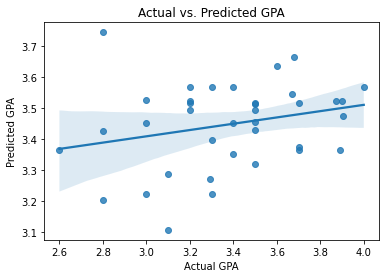

In [36]:
import seaborn as sns

sns.regplot(x=y_test, y=y_pred)
plt.xlabel('Actual GPA')
plt.ylabel('Predicted GPA')
plt.title('Actual vs. Predicted GPA')
plt.show()

The code above is creating a scatter plot that compares the actual GPA values (y_test) against the predicted GPA values (y_pred) from the linear regression model. The sns.regplot() function is used to plot the data points and a regression line that best fits the data.

The x-axis represents the actual GPA values, and the y-axis represents the predicted GPA values. Each point on the plot represents a single data point (i.e., a student's actual and predicted GPA).

The plot allows us to visualize how well the model predicts actual GPA values. A good model will have the points clustered around the regression line, indicating that the predicted values are close to the actual values. The slope and direction of the regression line indicate the strength and direction of the relationship between the actual and predicted values.




# Vizualizations

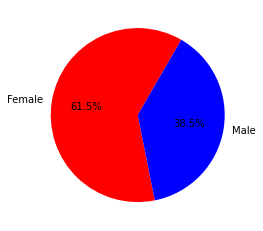

In [37]:
# here we create the actual pie chart of the gender distribution
plt.pie(data['Gender'].value_counts(), labels=['Female', 'Male'], colors = ['red', 'blue'], autopct = '%1.1f%%', startangle=60)
plt.show()

The code above creates a pie chart that visualizes the distribution of genders in the data DataFrame.

The plt.pie() function is used to create the pie chart. The first argument is the data to be plotted, which is the result of data['Gender'].value_counts(), which counts the number of occurrences of each gender in the Gender column. The labels argument is used to set the labels for the different categories, which are 'Female' and 'Male' in this case. The colors argument is used to set the colors for the different categories. The autopct argument is used to format the percentages displayed on the pie chart, and the startangle argument is used to set the starting angle for the first slice of the pie.

The resulting pie chart shows the proportion of females and males in the data set. The size of each slice represents the proportion of the corresponding gender in the data set. The percentage of each gender is also displayed on each slice of the pie chart.

<AxesSubplot:>

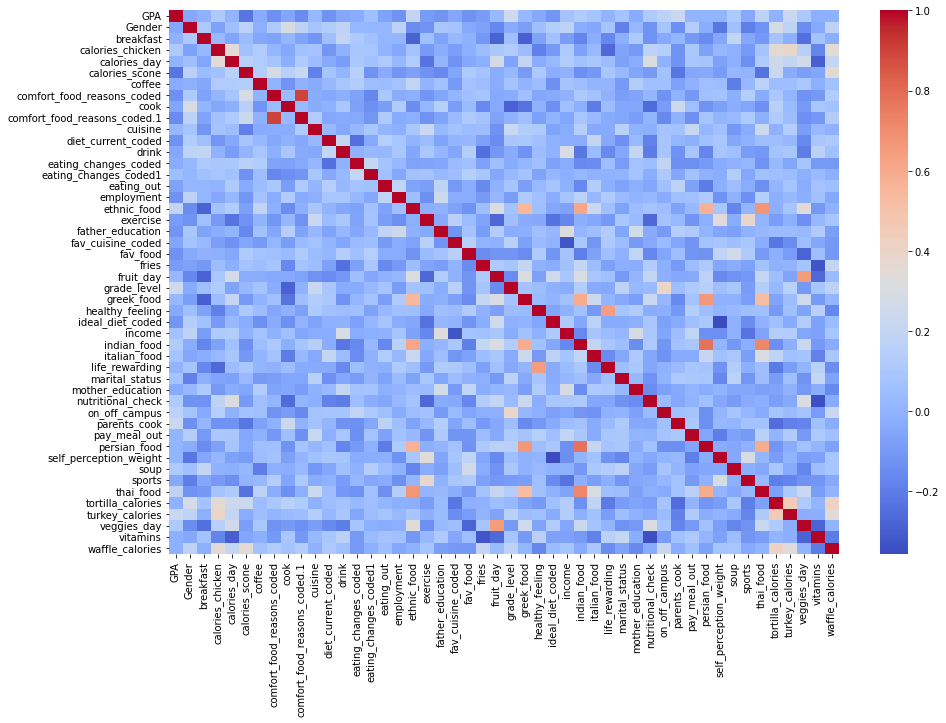

In [38]:
fig, ax = plt.subplots()
fig.set_size_inches(15, 10)
sns.heatmap(data.corr(), cmap='coolwarm')
# this code creates a visually appealing plot that shows the correlations between the columns of a DataFrame. The plot can be useful for identifying patterns and relationships between the variables.

The code above creates a heatmap visualization of the correlation matrix of the data DataFrame.

The plt.subplots() function is used to create a figure and a set of subplots. The figsize argument is used to set the size of the figure in inches. The resulting figure object and axes object are stored in the fig and ax variables, respectively.

The sns.heatmap() function is used to create the heatmap. The first argument is the correlation matrix of the data DataFrame, which is generated using the corr() method of the DataFrame. The cmap argument is used to set the color map for the heatmap. In this case, the 'coolwarm' color map is used.

The resulting heatmap shows a color-coded matrix of the correlation coefficients between all pairs of variables in the data DataFrame. The color scale on the right-hand side of the heatmap indicates the strength of the correlation, with warmer colors indicating stronger positive correlations, cooler colors indicating stronger negative correlations, and white indicating no correlation. The diagonal of the heatmap shows the correlation of each variable with itself, which is always 1.




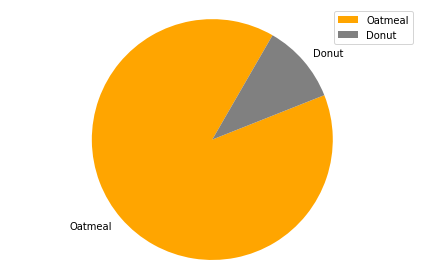

In [39]:
#we know that 1 is the cereal option and 2 is the donut option
# the cereal option is selected 89.3% of the time and 10.7% selected the donut
patches, texts = plt.pie(data['breakfast'].value_counts(),
                         labels=['Oatmeal', 'Donut'],
                         colors = ['orange', 'gray'],
                         startangle=60
                         )
plt.legend(patches, ['Oatmeal', 'Donut'])
plt.axis('equal')
plt.tight_layout()
plt.show()

This code generates a pie chart showing the frequency of two breakfast options, "Oatmeal" and "Donut," in a dataset.

The data['breakfast'].value_counts() method counts the number of occurrences of each breakfast option in the 'breakfast' column of the dataset. The resulting counts are then used to create a pie chart.

The labels parameter of the pie() function provides the labels for the two breakfast options being charted: 'Oatmeal' and 'Donut'. The colors parameter provides the colors for the two slices of the pie chart.

The startangle parameter specifies the angle at which the chart begins. The patches and texts variables capture the output of the pie() function to create the legend with the plt.legend() function.

Finally, plt.axis('equal') sets the aspect ratio of the chart to be equal, and plt.tight_layout() ensures that the chart is neatly formatted. plt.show() displays the chart.

In [41]:
data['calories_day'].value_counts()

3.000000    62
4.000000    22
3.028302    19
2.000000    19
Name: calories_day, dtype: int64

The code data['calories_day'].value_counts() returns the count of unique values present in the 'calories_day' column of the dataset 'data'. It counts the frequency of each unique value present in the 'calories_day' column and returns it as a pandas Series object with the unique values as index and their respective frequency as values. This can be useful in identifying the most common or frequent values in the column and can provide insight into the distribution of data in that column.

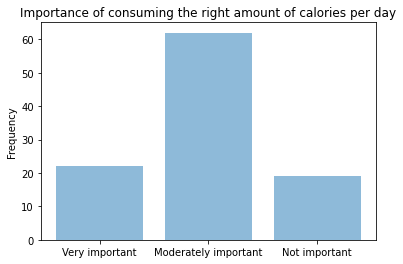

In [42]:
#the importance of calories per day
objects = ('Very important', 'Moderately important', 'Not important')
y_pos = np.arange(len(objects))
performance = [22,62,19]

plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('Frequency')
plt.title('Importance of consuming the right amount of calories per day')

plt.show()

The code is creating a vertical bar chart using Matplotlib library.

The objects list represents the labels that will be placed on the x-axis of the bar chart.

The y_pos array represents the position of each label on the x-axis. It is generated using the numpy arange function with the length of the objects list as its argument.

The performance list represents the frequency or count of the responses for each label in the objects list.

The plt.bar function takes the y positions, performance values and alpha value as arguments and creates a vertical bar chart. The align parameter centers the bars on the x-axis.

The plt.xticks function sets the x-tick labels to be the elements of the objects list.

The plt.ylabel function sets the y-axis label to 'Frequency', and plt.title sets the title of the chart to 'Importance of consuming the right amount of calories per day'.

Finally, plt.show() displays the chart.




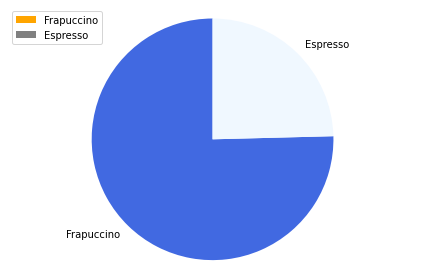

In [43]:
#frapuccino or espresso?
plt.pie(data['coffee'].value_counts(), labels=['Frapuccino', 'Espresso'], colors = ['royalblue', 'aliceblue'],startangle=90)
plt.legend(patches, ['Frapuccino', 'Espresso'], loc="best")
plt.axis('equal')
plt.tight_layout()
plt.show()

The code is creating a pie chart using plt.pie() method to visualize the distribution of coffee variable in the dataset. The data['coffee'].value_counts() method returns the count of unique values in the coffee column.

The labels parameter in the plt.pie() method specifies the labels for each section of the pie chart. The colors parameter specifies the colors for each section of the pie chart. The startangle parameter rotates the pie chart to a specific angle.

The plt.legend() method creates a legend box for the pie chart. The patches parameter represents the individual sections of the pie chart, and the labels parameter specifies the labels for each section.

Finally, plt.axis('equal') method ensures that the pie chart is displayed as a circle, and plt.tight_layout() method adjusts the padding around the plot. The chart is then displayed using plt.show() method.

In [45]:
data['cook'].value_counts()

3.000000    49
2.000000    33
4.000000    18
1.000000    12
5.000000     7
2.786885     3
Name: cook, dtype: int64

The code data['cook'].value_counts() is used to count the number of occurrences of each unique value in the cook column of the dataset data. It returns a pandas Series object with the counts of each unique value in the column, sorted in descending order. This can be useful for understanding the distribution of values in the column and identifying any outliers or unusual values.

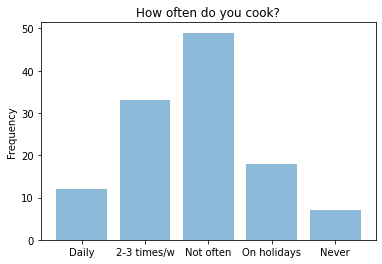

In [46]:
#last one for this kernel. how often do these 18-22 year olds cook?
objects = ('Daily', '2-3 times/w', 'Not often', 'On holidays', 'Never')
y_pos = np.arange(len(objects))
performance = [12, 33, 49, 18, 7]

plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('Frequency')
plt.title('How often do you cook?')

plt.show()

This code creates a bar chart to visualize the frequency distribution of responses to the question "How often do you cook?" The variable objects contains the different response options, while performance contains the number of respondents who selected each option.

y_pos is used to set the position of the bars on the x-axis, and plt.bar(y_pos, performance, align='center', alpha=0.5) creates the bar chart. plt.xticks(y_pos, objects) is used to set the x-axis tick labels to the response options, while plt.ylabel('Frequency') and plt.title('How often do you cook?') set the y-axis label and chart title, respectively. Finally, plt.show() displays the chart.

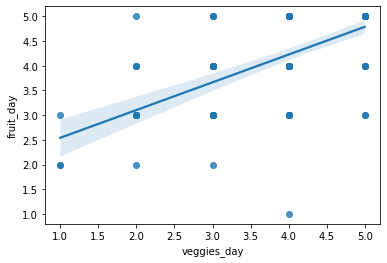

In [47]:
fruit_veg = sns.regplot(x='veggies_day',y='fruit_day',data=data)

The code is creating a scatter plot using Seaborn's regplot function, where the x axis represents the number of servings of vegetables consumed per day and the y axis represents the number of servings of fruits consumed per day.

The data argument specifies the DataFrame containing the data to be plotted. The plot shows the relationship between the two variables, with each data point representing a respondent's daily consumption of fruits and vegetables. The regression line in the plot indicates the general trend or direction of the relationship between the two variables, with a positive slope indicating that as vegetable consumption increases, so does fruit consumption. The plot can help in analyzing the correlation between the two variables and identifying any outliers or patterns in the data.

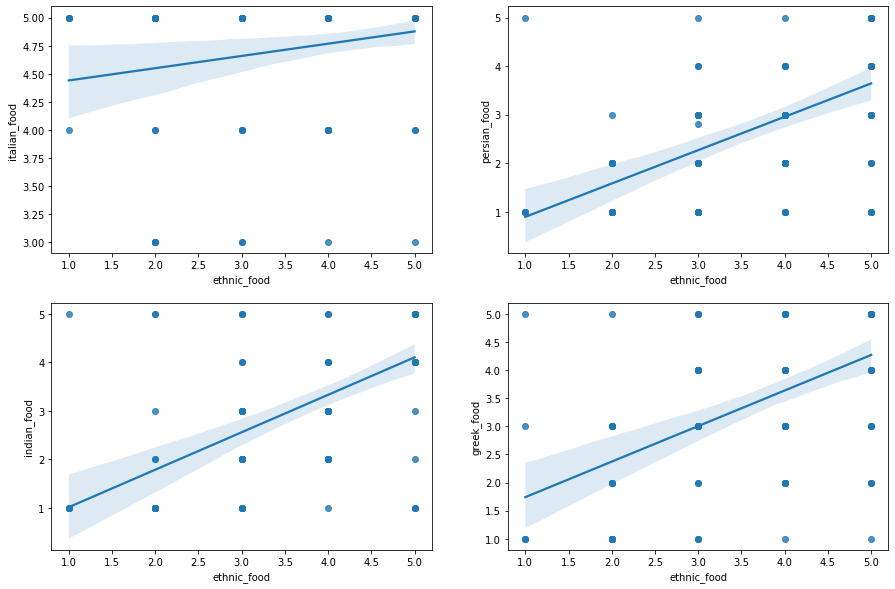

In [48]:
fig, axes = plt.subplots(nrows=2,ncols=2)
fig.set_size_inches(15, 10)
eth_thai = sns.regplot(x='ethnic_food',y='italian_food',data = data, ax=axes[0,0])
eth_pers = sns.regplot(x='ethnic_food',y='persian_food',data = data, ax=axes[0,1])
eth_ind = sns.regplot(x='ethnic_food',y='indian_food',data = data, ax=axes[1,0])
eth_grk = sns.regplot(x='ethnic_food',y='greek_food',data = data, ax=axes[1,1])

This code creates a 2x2 grid of subplots using the subplots() function of matplotlib. The nrows and ncols parameters specify the number of rows and columns in the grid. The size of the figure is set using the set_size_inches() method.

Four scatter plots are created using the Seaborn regplot() function. Each scatter plot shows the relationship between ethnic_food (x-axis) and a different type of cuisine (y-axis): Italian, Persian, Indian, and Greek. The scatter plots are plotted in different subplots of the grid using the ax parameter, which specifies the subplot to use.

The resulting figure shows four scatter plots, one in each subplot of the grid, that represent the relationship between the consumption of ethnic food and different types of cuisine.

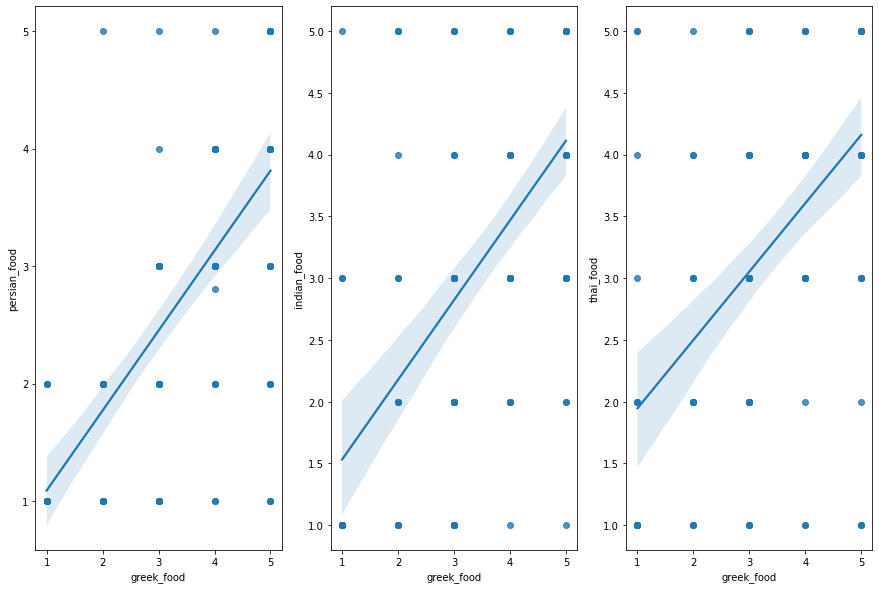

In [49]:
fig, axes = plt.subplots(ncols=3)
fig.set_size_inches(15, 10)
grk_per = sns.regplot(x='greek_food',y='persian_food',data = data, ax=axes[0])
grk_ind = sns.regplot(x='greek_food',y='indian_food',data = data, ax=axes[1])
grk_tha = sns.regplot(x='greek_food',y='thai_food',data = data, ax=axes[2])

This code creates a figure with three scatter plots side by side, each plotting the relationship between the consumption of Greek food and the consumption of a different type of cuisine: Persian, Indian, and Thai food.

fig, axes = plt.subplots(ncols=3) creates a figure with three subplots arranged horizontally, and assigns them to the variable axes.

fig.set_size_inches(15, 10) sets the size of the figure to be 15 inches wide and 10 inches tall.

grk_per = sns.regplot(x='greek_food',y='persian_food',data = data, ax=axes[0]) creates the first scatter plot, showing the relationship between Greek and Persian food consumption. The x and y parameters specify the variables to plot on the x and y axes, respectively, and data specifies the DataFrame to use. The ax=axes[0] parameter specifies that this plot should be placed in the first subplot.

grk_ind = sns.regplot(x='greek_food',y='indian_food',data = data, ax=axes[1]) creates the second scatter plot, showing the relationship between Greek and Indian food consumption. The ax=axes[1] parameter specifies that this plot should be placed in the second subplot.

grk_tha = sns.regplot(x='greek_food',y='thai_food',data = data, ax=axes[2]) creates the third scatter plot, showing the relationship between Greek and Thai food consumption. The ax=axes[2] parameter specifies that this plot should be placed in the third subplot.

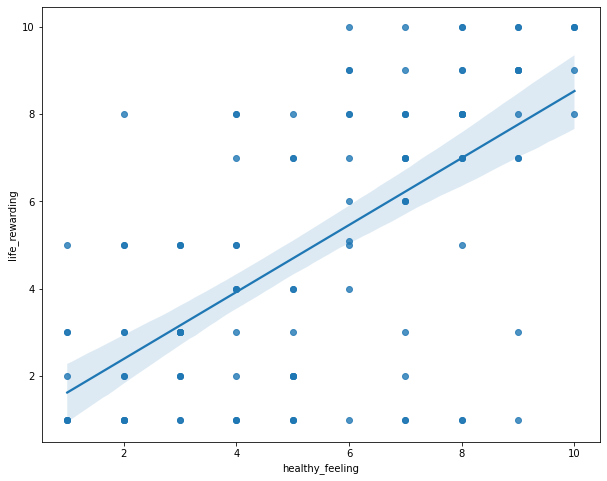

In [50]:
feel = sns.regplot(x='healthy_feeling',y='life_rewarding',data = data)
feel.figure.set_size_inches(10,8)

This code creates a scatter plot using Seaborn library, with "healthy_feeling" on the x-axis and "life_rewarding" on the y-axis, using the data stored in the "data" variable.

The scatter plot helps to visualize the relationship between the two variables. The function sns.regplot() adds a linear regression line to the scatter plot, which can help to see the overall trend of the relationship between the two variables.

The last line feel.figure.set_size_inches(10,8) sets the figure size of the plot to be 10 inches wide and 8 inches tall.

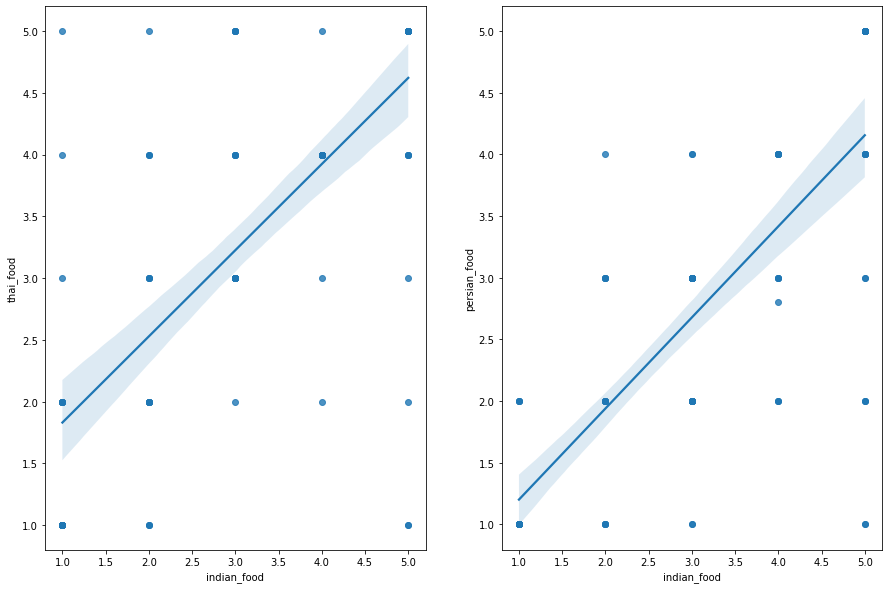

In [51]:
fig, axes = plt.subplots(ncols=2)
fig.set_size_inches(15, 10)
ind_tha = sns.regplot(x='indian_food',y='thai_food',data = data, ax=axes[0])
ind_per = sns.regplot(x='indian_food',y='persian_food',data = data, ax=axes[1])

This code creates a figure with two subplots, side by side. Each subplot shows a scatter plot of two different columns from the data DataFrame. The first subplot shows a regression plot between the indian_food and thai_food columns, while the second subplot shows a regression plot between the indian_food and persian_food columns.

A regression plot is a type of scatter plot with a regression line plotted through the data points. It is used to explore the relationship between two variables and to visualize the strength and direction of the relationship. The slope of the line represents the change in the dependent variable for a unit change in the independent variable. The scatter plot also shows the spread of the data points around the regression line, which can provide insights into the variability of the relationship.

By comparing the two subplots, we can see the relationship between Indian food and Thai food is positively correlated, meaning that as one increases, the other tends to increase as well. However, there is less of a relationship between Indian food and Persian food, as there is more variation in the data points and the regression line is less steep.

Well, all these relationships tend to show a positive trend. There might be several other patterns in the data set waiting to be unearthed :)